In [ ]:
import pandas as pd
df = pd.read_parquet("datasets/consolidated.parquet")
display(df)
display(df.dtypes)




,title,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
0,! .. عشان ما تنضربش على قفاك,0,0,0,0,0,0,0,0,0,...,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471
1,!!شعراء إرهابيون,0,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2,!búscalo! (look it up!): a quick reference gui...,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
3,!exacto!: a practical guide to spanish grammar,0,0,0,0,0,0,0,0,0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
4,!feliz navidad: celebrating a mexican christmas,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486019,ｍな女王様と××したいってばよ [m na jousama to xx shitai tte...,0,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1486020,ｍの劣情 [m no retsujou],0,0,0,0,0,0,0,0,0,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
1486021,ｓａｍｕｒａｉ ｄｅｅｐｅｒ ｋｙｏ（１）,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1486022,ｘｂｌａｄｅ（１０）,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


title          object
_int_0         uint16
_int_1         uint16
_int_2         uint16
_int_3         uint16
               ...   
_float_127    float32
_float_128    float32
_float_129    float32
_float_130    float32
_float_131    float32
Length: 265, dtype: object

In [ ]:
price_df = pd.read_csv("datasets/Buchpreise_2009-2024.csv")

def comp_months(df):
    split_date = df['date'].str.split("/")
    df['year'] = pd.to_numeric(split_date.str[-1], errors='coerce', downcast='integer')

    df['month'] = pd.to_numeric(split_date.str[0], errors='coerce', downcast='integer')

    # Compute months since December 2006
    df['month'] = ((df['year'] - 2006) * 12) + (df['month'] - 12)

    return df

price_df = comp_months(price_df)
price_df = price_df.dropna(subset=['title'])
price_df = price_df[price_df['year'] < 2016]
price_df['month'] = price_df['month'].astype(int)


display(price_df)
display(price_df.dtypes)


,year,title,author,price,Shortlist/Longlist/Winner,ISBN-10,date,ISBN-13,month
0,2009.0,Olive Kitteridge,Elizabeth Strout,Pulitzer Prize for Fiction,Winner,140006208X,4/20/2009,9.781400e+12,28
1,2010.0,Tinkers,Paul Harding,Pulitzer Prize for Fiction,Winner,1446455998,4/12/2010,9.781446e+12,40
2,2011.0,A Visit from the Goon Squad,Jennifer Egan,Pulitzer Prize for Fiction,Winner,0231545401,4/18/2011,9.780232e+12,52
3,2013.0,The Orphan Master's Son,Adam Johnson,Pulitzer Prize for Fiction,Winner,0231557450,4/15/2013,9.780232e+12,76
4,2014.0,The Goldfinch,Donna Tartt,Pulitzer Prize for Fiction,Winner,3656925348,4/14/2014,9.783657e+12,88
...,...,...,...,...,...,...,...,...,...
1375,2009.0,Little Brother,Cory Doctorow,Nebula Award,Shortlist,1473231930,5/2/2009,9.781473e+12,29
1376,2009.0,Cauldron,Jack McDevitt,Nebula Award,Shortlist,1472203305,5/2/2009,9.781472e+12,29
1377,2009.0,Brasyl,Ian McDonald,Nebula Award,Shortlist,0575087358,5/2/2009,9.780575e+12,29
1378,2009.0,Making Money,Terry Pratchett,Nebula Award,Shortlist,1407034014,5/2/2009,9.781407e+12,29


year                         float64
title                         object
author                        object
price                         object
Shortlist/Longlist/Winner     object
ISBN-10                       object
date                          object
ISBN-13                      float64
month                          int64
dtype: object

In [5]:
display(price_df)

,year,title,author,price,Shortlist/Longlist/Winner,ISBN-10,date,ISBN-13,month
0,2009.0,Olive Kitteridge,Elizabeth Strout,Pulitzer Prize for Fiction,Winner,140006208X,4/20/2009,9.781400e+12,28
1,2010.0,Tinkers,Paul Harding,Pulitzer Prize for Fiction,Winner,1446455998,4/12/2010,9.781446e+12,40
2,2011.0,A Visit from the Goon Squad,Jennifer Egan,Pulitzer Prize for Fiction,Winner,0231545401,4/18/2011,9.780232e+12,52
3,2013.0,The Orphan Master's Son,Adam Johnson,Pulitzer Prize for Fiction,Winner,0231557450,4/15/2013,9.780232e+12,76
4,2014.0,The Goldfinch,Donna Tartt,Pulitzer Prize for Fiction,Winner,3656925348,4/14/2014,9.783657e+12,88
...,...,...,...,...,...,...,...,...,...
1375,2009.0,Little Brother,Cory Doctorow,Nebula Award,Shortlist,1473231930,5/2/2009,9.781473e+12,29
1376,2009.0,Cauldron,Jack McDevitt,Nebula Award,Shortlist,1472203305,5/2/2009,9.781472e+12,29
1377,2009.0,Brasyl,Ian McDonald,Nebula Award,Shortlist,0575087358,5/2/2009,9.780575e+12,29
1378,2009.0,Making Money,Terry Pratchett,Nebula Award,Shortlist,1407034014,5/2/2009,9.781407e+12,29


In [6]:
display(df[df["title"] == "olive kitteridge"])


,title,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
785243,olive kitteridge,0,0,0,0,0,0,0,0,0,...,3.675951,3.678723,3.680952,3.681675,3.679167,3.677003,3.676804,3.679139,3.679139,3.679139


,year,title,author,price,Shortlist/Longlist/Winner,ISBN-10,date,ISBN-13,month
0,2009.0,olive kitteridge,Elizabeth Strout,Pulitzer Prize for Fiction,Winner,140006208X,4/20/2009,9.781400e+12,28
1,2010.0,tinkers,Paul Harding,Pulitzer Prize for Fiction,Winner,1446455998,4/12/2010,9.781446e+12,40
2,2011.0,a visit from the goon squad,Jennifer Egan,Pulitzer Prize for Fiction,Winner,0231545401,4/18/2011,9.780232e+12,52
3,2013.0,the orphan master's son,Adam Johnson,Pulitzer Prize for Fiction,Winner,0231557450,4/15/2013,9.780232e+12,76
4,2014.0,the goldfinch,Donna Tartt,Pulitzer Prize for Fiction,Winner,3656925348,4/14/2014,9.783657e+12,88
5,2015.0,all the light we cannot see,Anthony Doerr,Pulitzer Prize for Fiction,Winner,1476746583,4/20/2015,9.781477e+12,100


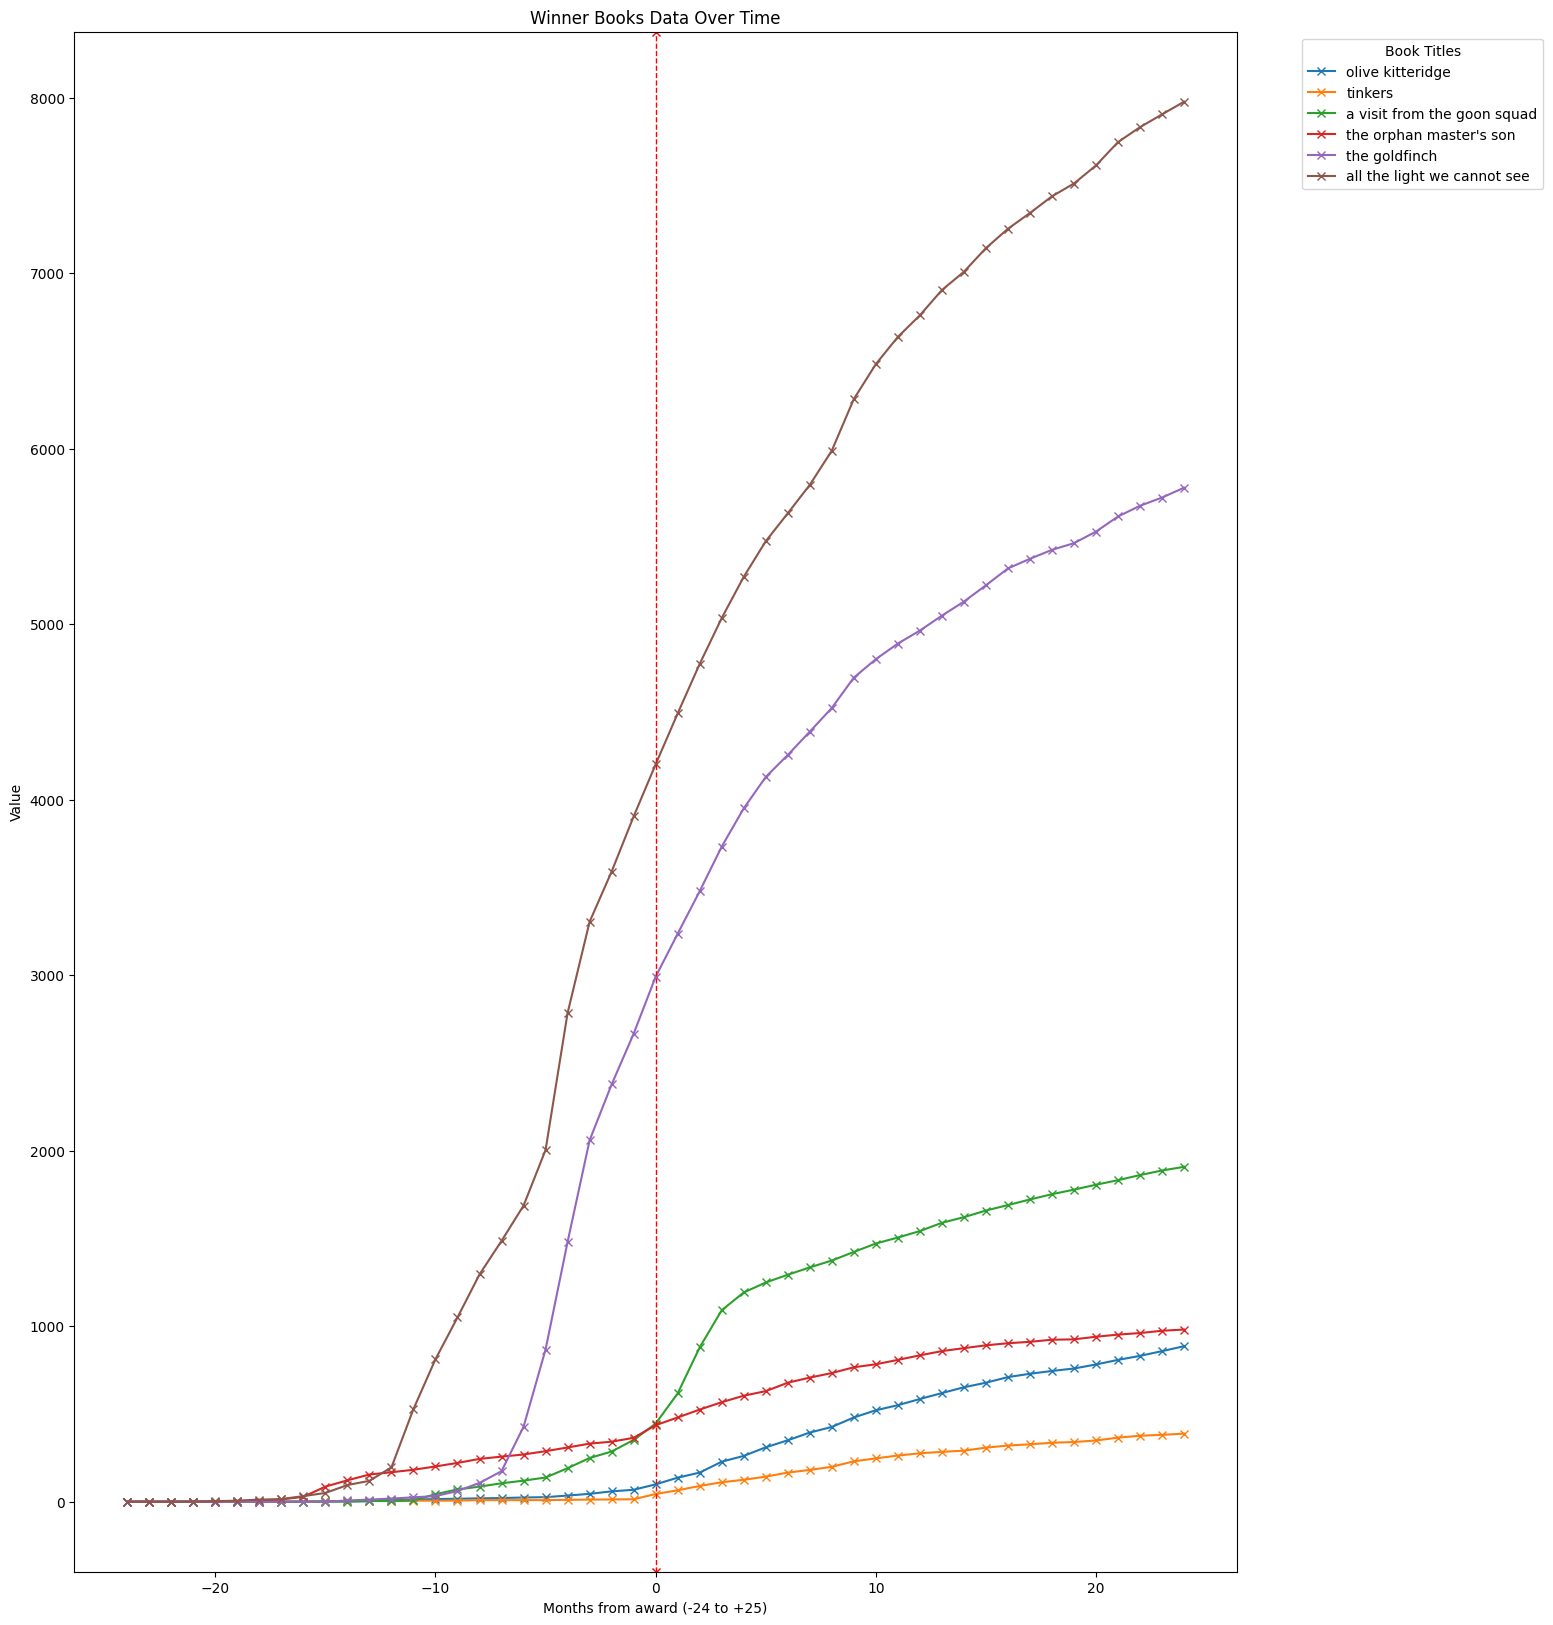

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter price_df for winners and preprocess titles
#winners = price_df[price_df['Shortlist/Longlist/Winner'].str.contains('Winner', case=False, na=False)].copy()
winners = price_df[price_df['price'] == "Pulitzer Prize for Fiction"].copy()
winners['title'] = winners['title'].str.strip().str.lower()
display(winners)

# Loop over each winner and extract relevant data from df
plt.figure(figsize=(15, 20))
for _, row in winners.iterrows():
    title = row['title']
    month = row['month']
    
    
    # Construct column names for -12 to +12 months
    cols = [f'_int_{month + i}' for i in range(-24, 25) if f'_int_{month + i}' in df.columns]

    # Extract and plot data if available
    book_data = df[df['title'] == title][cols].T  # Transpose for plotting
    # Get book title from trans_df
    plt.plot([i for i in range(-24,25)], book_data, label=title, marker='x')

plt.axvline(x=0, color='red', linestyle='--', linewidth=1,  marker='x')
plt.xlabel('Months from award (-24 to +25)')
plt.ylabel('Value')
plt.title('Winner Books Data Over Time')
plt.legend(title="Book Titles", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [8]:
display(df)

,title,_int_0,_int_1,_int_2,_int_3,_int_4,_int_5,_int_6,_int_7,_int_8,...,_float_122,_float_123,_float_124,_float_125,_float_126,_float_127,_float_128,_float_129,_float_130,_float_131
0,! .. عشان ما تنضربش على قفاك,0,0,0,0,0,0,0,0,0,...,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471,3.176471
1,!!شعراء إرهابيون,0,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2,!búscalo! (look it up!): a quick reference gui...,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
3,!exacto!: a practical guide to spanish grammar,0,0,0,0,0,0,0,0,0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
4,!feliz navidad: celebrating a mexican christmas,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486019,ｍな女王様と××したいってばよ [m na jousama to xx shitai tte...,0,0,0,0,0,0,0,0,0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1486020,ｍの劣情 [m no retsujou],0,0,0,0,0,0,0,0,0,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
1486021,ｓａｍｕｒａｉ ｄｅｅｐｅｒ ｋｙｏ（１）,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1486022,ｘｂｌａｄｅ（１０）,0,0,0,0,0,0,0,0,0,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


,year,title,author,price,Shortlist/Longlist/Winner,ISBN-10,date,ISBN-13,month
153,2009.0,du stirbst nicht,Kathrin Schmidt,Deutscher Buchpreis,Winner,3462301845,10/12/2009,9.783462e+12,34
173,2010.0,tauben fliegen auf,Melinda Nadj Abonji,Deutscher Buchpreis,Winner,3518735926,10/4/2010,9.783519e+12,46
193,2011.0,in zeiten des abnehmenden lichts,Eugen Ruge,Deutscher Buchpreis,Winner,3644014116,10/10/2011,9.783644e+12,58
213,2012.0,landgericht,Ursula Krechel,Deutscher Buchpreis,Winner,3442746493,10/8/2012,9.783443e+12,70
233,2013.0,das ungeheuer,Terézia Mora,Deutscher Buchpreis,Winner,3641591392,10/7/2013,9.783642e+12,82
253,2014.0,kruso,Lutz Seiler,Deutscher Buchpreis,Winner,3518739360,10/6/2014,9.783519e+12,94
273,2015.0,die erfindung der roten armee fraktion durch e...,Frank Witzel,Deutscher Buchpreis,Winner,NaN,10/12/2015,NaN,106


,_int_22,_int_23,_int_24,_int_25,_int_26,_int_27,_int_28,_int_29,_int_30,_int_31,...,_int_37,_int_38,_int_39,_int_40,_int_41,_int_42,_int_43,_int_44,_int_45,_int_46
330861,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1


/tmp/ipykernel_7092/2016349865.py:22: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  to_plot[i] += int(value)


,_int_34,_int_35,_int_36,_int_37,_int_38,_int_39,_int_40,_int_41,_int_42,_int_43,...,_int_49,_int_50,_int_51,_int_52,_int_53,_int_54,_int_55,_int_56,_int_57,_int_58
1021753,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,2,2


/tmp/ipykernel_7092/2016349865.py:22: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  to_plot[i] += int(value)


,_int_46,_int_47,_int_48,_int_49,_int_50,_int_51,_int_52,_int_53,_int_54,_int_55,...,_int_61,_int_62,_int_63,_int_64,_int_65,_int_66,_int_67,_int_68,_int_69,_int_70
539278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/tmp/ipykernel_7092/2016349865.py:22: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  to_plot[i] += int(value)


,_int_58,_int_59,_int_60,_int_61,_int_62,_int_63,_int_64,_int_65,_int_66,_int_67,...,_int_73,_int_74,_int_75,_int_76,_int_77,_int_78,_int_79,_int_80,_int_81,_int_82
618716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


/tmp/ipykernel_7092/2016349865.py:22: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  to_plot[i] += int(value)


,_int_70,_int_71,_int_72,_int_73,_int_74,_int_75,_int_76,_int_77,_int_78,_int_79,...,_int_85,_int_86,_int_87,_int_88,_int_89,_int_90,_int_91,_int_92,_int_93,_int_94
270847,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


/tmp/ipykernel_7092/2016349865.py:22: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  to_plot[i] += int(value)


,_int_82,_int_83,_int_84,_int_85,_int_86,_int_87,_int_88,_int_89,_int_90,_int_91,...,_int_97,_int_98,_int_99,_int_100,_int_101,_int_102,_int_103,_int_104,_int_105,_int_106
595858,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,4,4,6,6,6


/tmp/ipykernel_7092/2016349865.py:22: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  to_plot[i] += int(value)


,_int_94,_int_95,_int_96,_int_97,_int_98,_int_99,_int_100,_int_101,_int_102,_int_103,...,_int_109,_int_110,_int_111,_int_112,_int_113,_int_114,_int_115,_int_116,_int_117,_int_118
303805,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,3,3,3


/tmp/ipykernel_7092/2016349865.py:22: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  to_plot[i] += int(value)


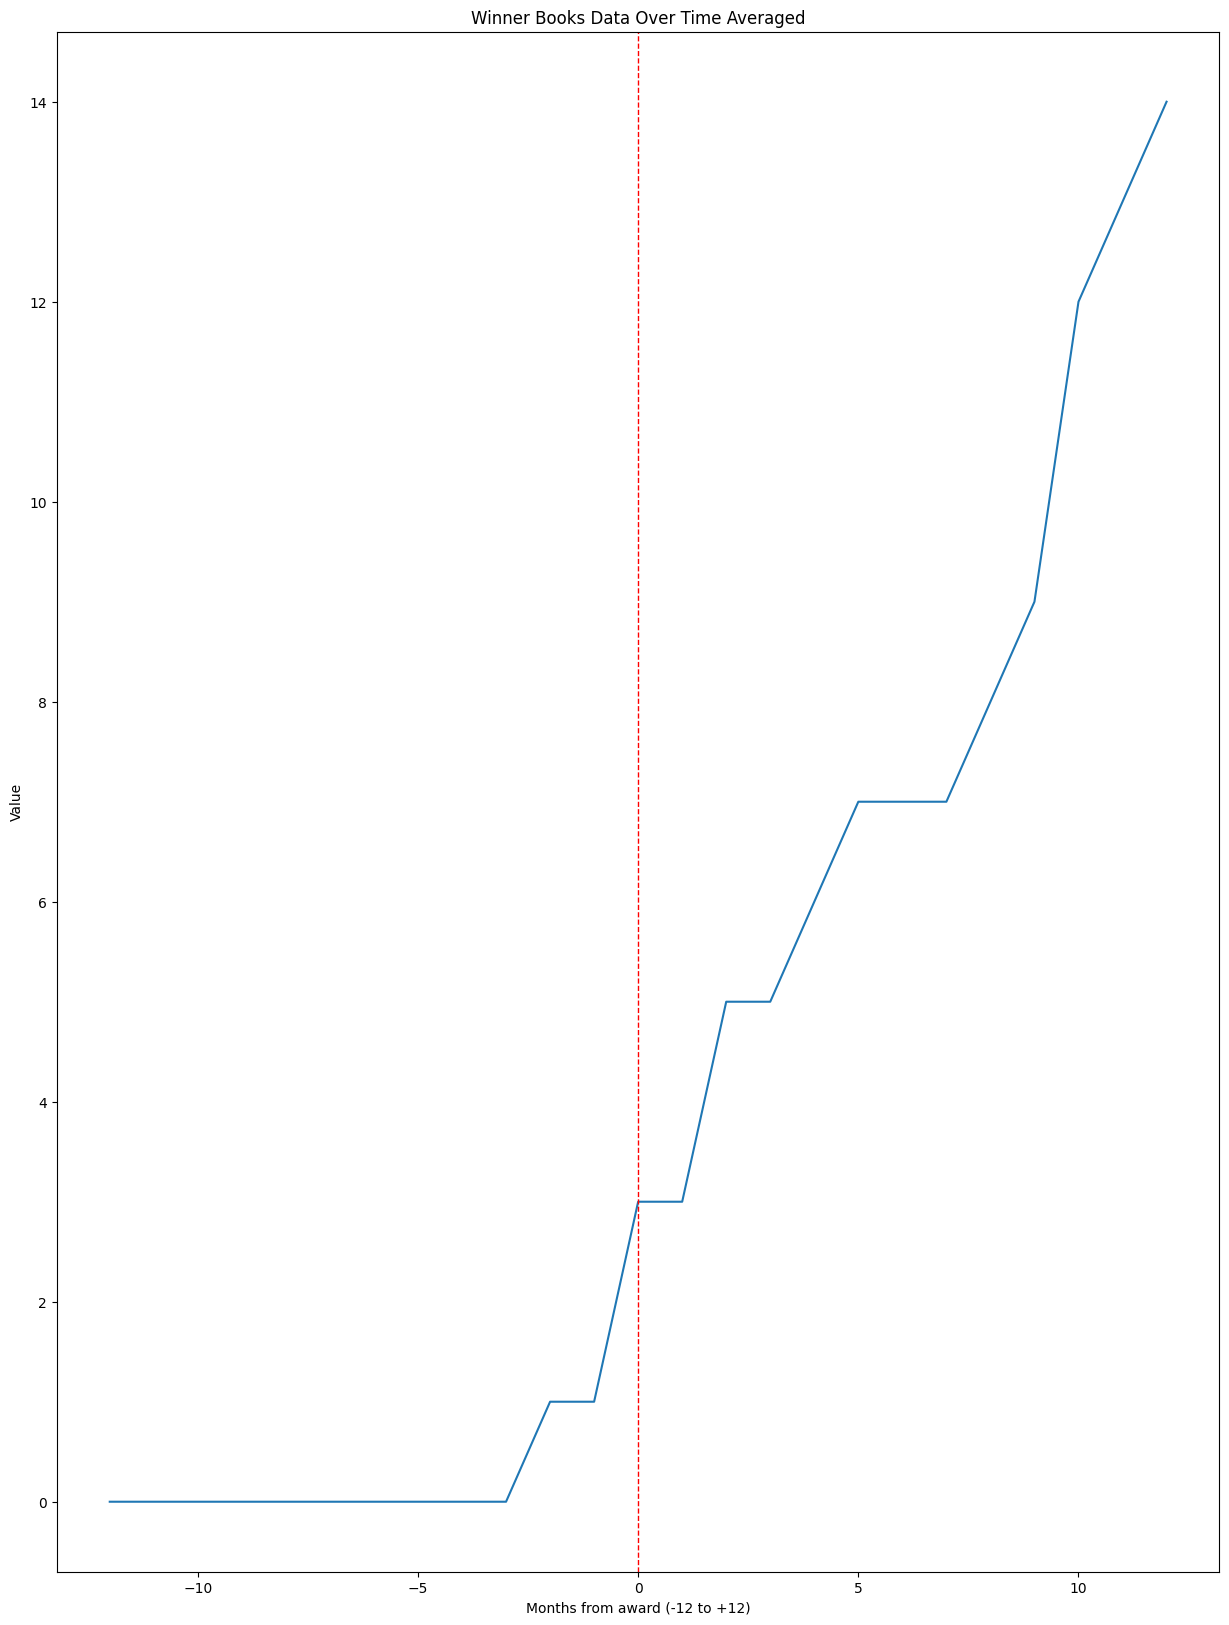

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter price_df for winners and preprocess titles
winners = price_df[price_df['Shortlist/Longlist/Winner'].str.contains('Winner', case=False, na=False)].copy()
winners['title'] = winners['title'].str.strip().str.lower()
winners = winners[winners['price'] == "Deutscher Buchpreis"].copy()

to_plot = [0 for _ in range(-12, 13)]
for _, row in winners.iterrows():
    title = row['title']
    month = row['month']
    
    # Construct column names for -12 to +12 months
    cols = [f'_int_{month + i}' for i in range(-12, 13) if f'_int_{month + i}' in df.columns]
    my_row = df[df['title'] == title][cols]
    display(my_row)
    for i, value in enumerate(my_row):
        value = my_row[value]
        try:
            to_plot[i] += int(value)
        except:
            pass



# Loop over each winner and extract relevant data from df
plt.figure(figsize=(15, 20))

plt.plot([i for i in range(-12,13)], to_plot)

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Months from award (-12 to +12)')
plt.ylabel('Value')
plt.title('Winner Books Data Over Time Averaged')
plt.show()

,year,title,author,price,Shortlist/Longlist/Winner,ISBN-10,date,ISBN-13,month
153,2009.0,du stirbst nicht,Kathrin Schmidt,Deutscher Buchpreis,Winner,3462301845,10/12/2009,9.783462e+12,34
154,2009.0,lichtjahre entfernt,Rainer Merkel,Deutscher Buchpreis,Shortlist,3104000611,10/12/2009,9.783104e+12,34
155,2009.0,atemschaukel,Herta Müller,Deutscher Buchpreis,Shortlist,3596512034,10/12/2009,9.783597e+12,34
156,2009.0,überm rauschen,Norbert Scheuer,Deutscher Buchpreis,Shortlist,3406590721,10/12/2009,9.783407e+12,34
157,2009.0,die frequenzen,Clemens J. Setz,Deutscher Buchpreis,Shortlist,3701742219,10/12/2009,9.783702e+12,34
...,...,...,...,...,...,...,...,...,...
288,2015.0,macht und widerstand,Ilija Trojanow,Deutscher Buchpreis,Longlist,3104036047,10/12/2015,9.783104e+12,106
289,2015.0,lucia binar und die russische seele,Vladimir Vertlib,Deutscher Buchpreis,Longlist,3552062823,10/12/2015,9.783552e+12,106
290,2015.0,applaus für bronikowski,Kai Weyand,Deutscher Buchpreis,Longlist,3835327658,10/12/2015,9.783835e+12,106
291,2015.0,der fuchs und dr. shimamura,Christine Wunnicke,Deutscher Buchpreis,Longlist,3937834990,10/12/2015,9.783938e+12,106


/tmp/ipykernel_7092/1424423554.py:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  to_plot[i] += int(value)
/tmp/ipykernel_7092/1424423554.py:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  to_plot[i] += int(value)
/tmp/ipykernel_7092/1424423554.py:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  to_plot[i] += int(value)
/tmp/ipykernel_7092/1424423554.py:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  to_plot[i] += int(value)
/tmp/ipykernel_7092/1424423554.py:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  to_pl

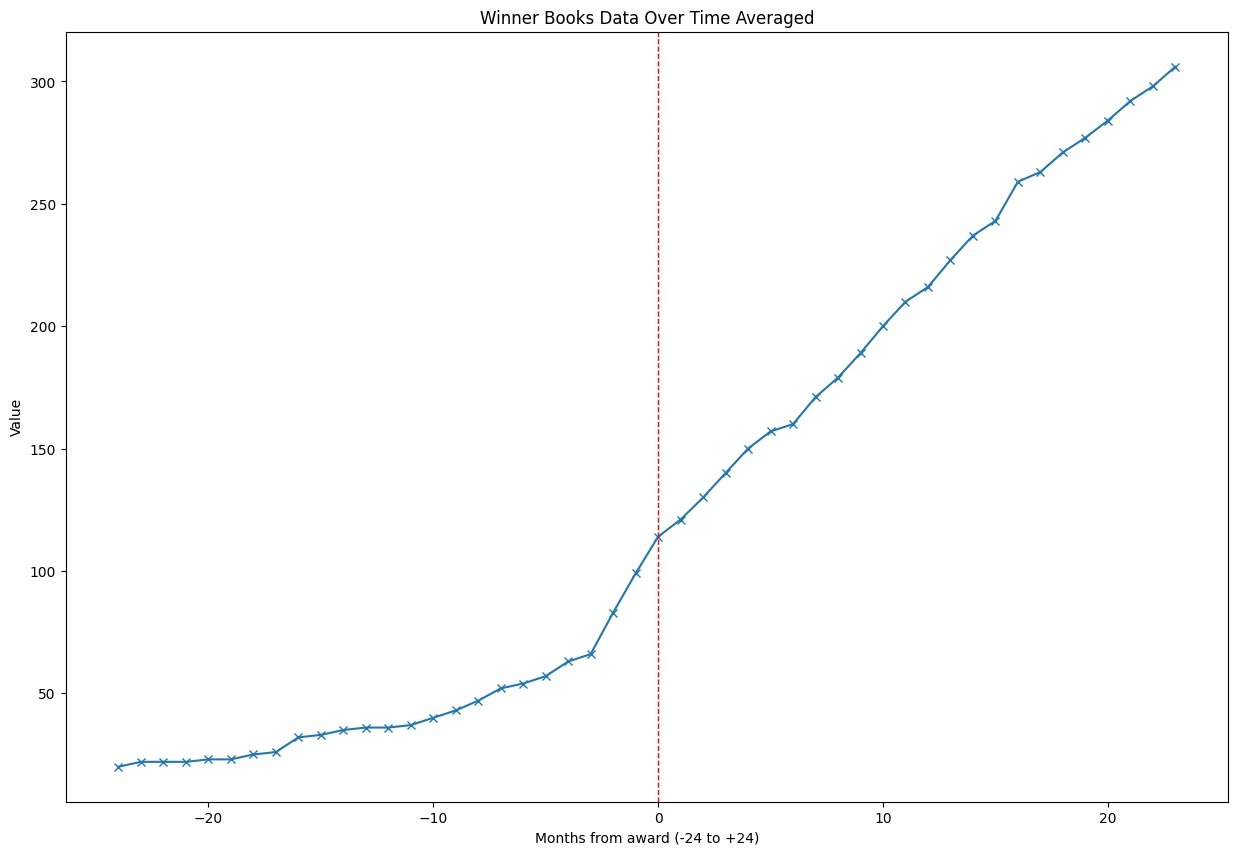

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter price_df for winners and preprocess titles
#winners = price_df[price_df['Shortlist/Longlist/Winner'].str.contains('Winner', case=False, na=False)].copy()
winners = price_df[price_df['price'] == "Deutscher Buchpreis"].copy()
winners['title'] = winners['title'].str.strip().str.lower()
display(winners)

to_plot = [0 for _ in range(-24, 24)]
for _, row in winners.iterrows():
    title = row['title']
    month = row['month']
    
    cols = [f'_int_{month + i}' for i in range(-24, 25) if f'_int_{month + i}' in df.columns]
    my_row = df[df['title'] == title][cols]
    for i, value in enumerate(my_row):
        value = my_row[value]
        try:
            to_plot[i] += int(value)
        except:
            pass



# Loop over each winner and extract relevant data from df
plt.figure(figsize=(15, 10))

plt.plot([i for i in range(-24,24)], to_plot, marker='x')

plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Months from award (-24 to +24)')
plt.ylabel('Value')
plt.title('Winner Books Data Over Time Averaged')
plt.show()

In [51]:
display(price_df)

,title,author,price,Shortlist/Longlist/Winner,ISBN-10,date,ISBN-13,month
0,Olive Kitteridge,Elizabeth Strout,Pulitzer Prize for Fiction,Winner,140006208X,4/20/2009,9781400062089,28
1,Tinkers,Paul Harding,Pulitzer Prize for Fiction,Winner,1446455998,4/12/2010,9781446455999,40
2,A Visit from the Goon Squad,Jennifer Egan,Pulitzer Prize for Fiction,Winner,0231545401,4/18/2011,9780231545402,52
3,The Orphan Master's Son,Adam Johnson,Pulitzer Prize for Fiction,Winner,0231557450,4/15/2013,9780231557450,76
4,The Goldfinch,Donna Tartt,Pulitzer Prize for Fiction,Winner,3656925348,4/14/2014,9783656925347,88
...,...,...,...,...,...,...,...,...
1375,Little Brother,Cory Doctorow,Nebula Award,Shortlist,1473231930,5/2/2009,9781473231931,29
1376,Cauldron,Jack McDevitt,Nebula Award,Shortlist,1472203305,5/2/2009,9781472203304,29
1377,Brasyl,Ian McDonald,Nebula Award,Shortlist,0575087358,5/2/2009,9780575087354,29
1378,Making Money,Terry Pratchett,Nebula Award,Shortlist,1407034014,5/2/2009,9781407034010,29
